In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load and read the image 

In [32]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img


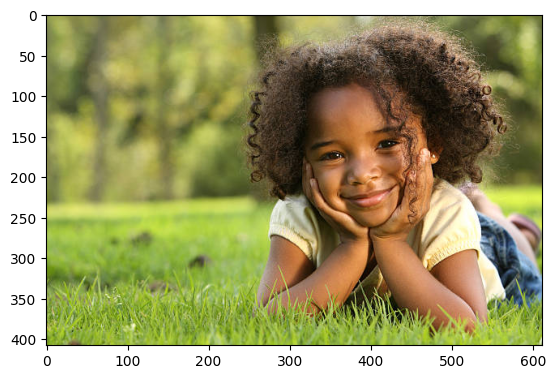

In [33]:
filename = "./input.jpg"
img = read_file(filename)

org_img = np.copy(img)

# create the edge mask 



In [34]:
def edge_mask(img,line_size,blur_value):
    
    """
    input : it takes real image
    output: return it's edges
    """
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)

    edge = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)

    return edge


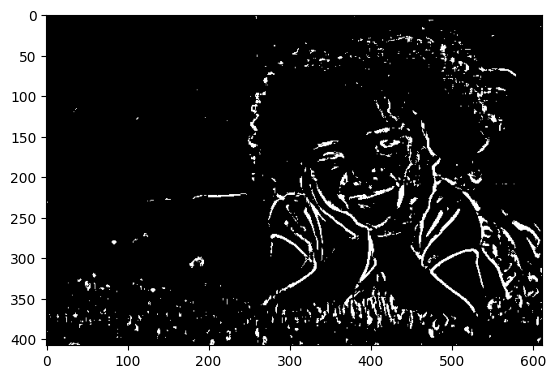

In [35]:
edges= edge_mask(img,7,7)

plt.imshow(edges,cmap="binary")
plt.show()


# Reduce the color pallet 

In [36]:
def color_quantization(img,k):

    # transform the image

    data = np.float32(img).reshape((-1,3))

    #criteria
    criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER , 20,0.01)

    # IMPLEMENT k-MEANS CLUSTERING 

    ret , label , center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result



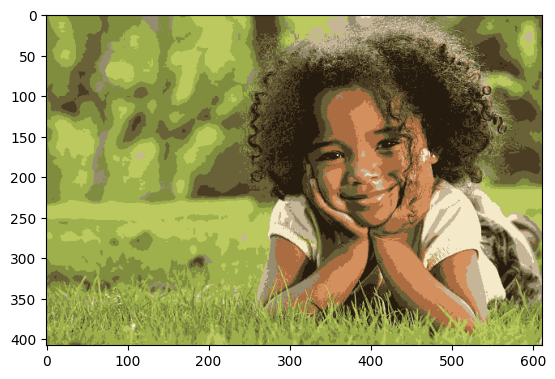

In [37]:
img_qu = color_quantization(img,11)

plt.imshow(img_qu)
plt.show()

# reduce the noise

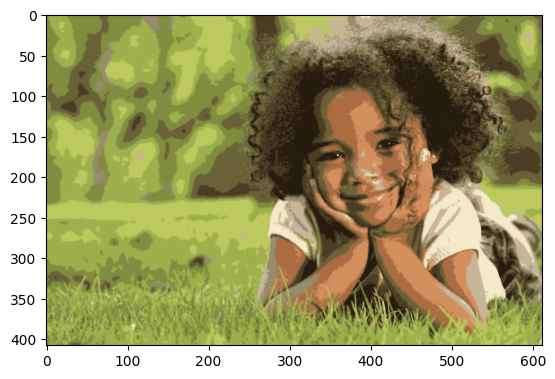

In [38]:
blurred = cv2.bilateralFilter(img_qu,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# Combine Edge mask with quantize image

In [39]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred,mask = edges)
    
    plt.imshow(c)
    plt.title("cartoon image")
    plt.show()

    plt.imshow(org_img)
    plt.title("real image")
    plt.show()

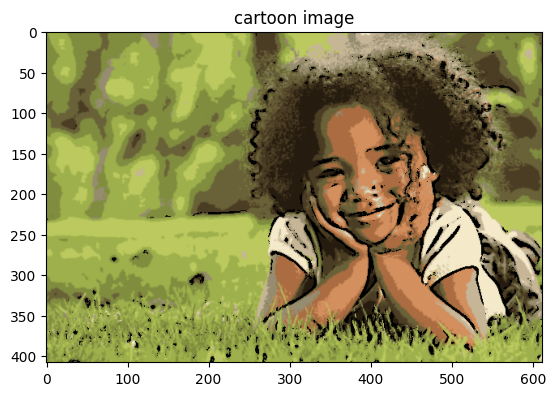

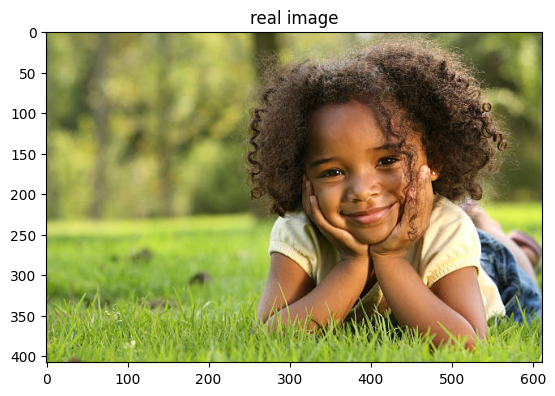

In [40]:
cartoon()